# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Castro, Denise Kyla B.\
_Student No._: 2022-10832\
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: November 16, 2024 and 11:50 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Denise Kyla B. Castro**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

The one-dimensional time-dependent Schrödinger equation for a free particle of mass M with no potential is given by:

$$
\frac{-\hbar^2 \Psi}{2M} \frac{\partial^2}{\partial x^2}= i\hbar \frac{\partial\Psi}{\partial t}
$$

One way to solve the time-dependent Schrödinger equation is using the Crank-Nicolson method, which approximates the evolution of the wavefunction over time. This method can be derived by applying Euler's method with a forward time step $h$ and reverse time step $-h$ and then taking their average:

$$
\psi(x,t+h) - h\frac{i\hbar}{4ma^2}[\psi(x+a,t+h) + \psi(x-a,t+h) - 2\psi(x,t+h)] = \psi(x,t) + h\frac{i\hbar}{4ma^2}[\psi(x+a,t) + \psi(x-a,t) - 2\psi(x,t)]
$$

From the given boundary conditions, we have grid points in between the boundaries at $a$,$2a$,$3a$, and so on. The values of \psi at these points can be represented in vector form as:

$$
\psi(t) = \begin{bmatrix}
  \psi(a,t) \\
  \psi(2a,t) \\
  \psi(3a,t) \\
  \dots
\end{bmatrix}

$$

With this, the Crank-Nicolson equation can be written in matrix form as:

$$
\mathbf{A}\psi(t+h) = \mathbf{B}\psi(t)
$$

where matrices $\mathbf{A}$ and $\mathbf{B}$ are both symmetric and tridiagonal defined to be:

$$
\mathbf{A} = 
\begin{bmatrix}
  a_{1} & a_{2} &  & \\
  a_{2} & a_{1} & a_{2} &  \\
  & a_{2} & a_{1} & a_{2} \\
  &  &  & \ddots
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
  b_{1} & b_{2} &  & \\
  b_{2} & b_{1} & b_{2} &  \\
  & b_{2} & b_{1} & b_{2} \\
  &  &  & \ddots
\end{bmatrix}
$$

where 
$a_{1} = 1 + h \frac{i\hbar}{2ma^2}$,
$b_{1} = 1 - h \frac{i\hbar}{2ma^2}$,
$a_{2} = - h \frac{i\hbar}{4ma^2}$, and
$b_{2} = h \frac{i\hbar}{4ma^2}$


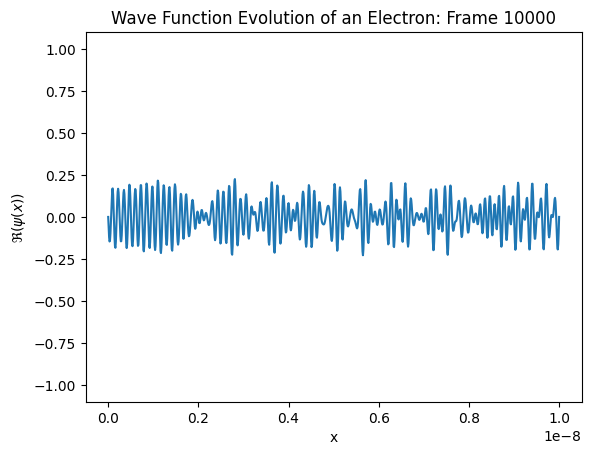

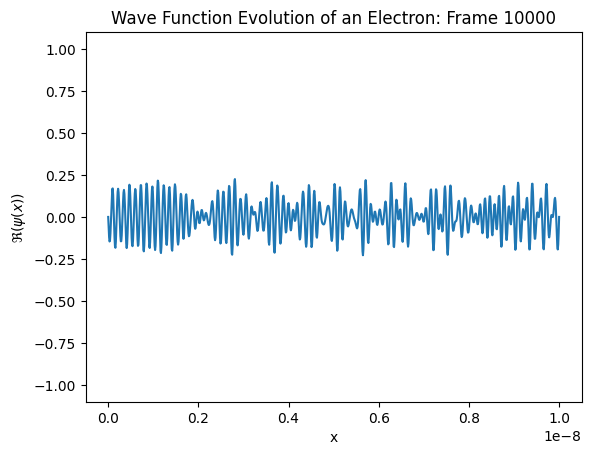

In [ ]:
import numpy as np                                                                          # library for working with arrays
import matplotlib.pyplot as plt                                                             # library for visualizatiofrom IPython.display import display
from IPython.display import display                                                         # imports display from the ipython.display module used to render plots

M = 9.109e-31                                                                               # mass of electron
L = 1e-8                                                                                    # length of box
h = 1e-18                                                                                   # size of time-step
time_steps = 10000                                                                          # total number of time steps
N = 1000                                                                                    # number of spatial slices
a = L/N                                                                                     # distance between spatial slices
hbar = 1.0546e-34                                                                           # reduced Planck's constant

# initial wave function parameters
x0 = L/2                                                                                    # initial position of wave packet (center)
sigma = 1e-10                                                                               # width of wave packet (standard deviation)
kappa = 5e10                                                                                # wave number (controls the wavelength of wave function)

def psi0(x):                                                                                # function that defines the initial wavefunction of electron
    return np.exp((-(x-x0)**2)/(2*sigma**2)) * np.exp(1j*kappa*x)                           

x = np.linspace(0,L,N+1)                                                                    # array of spatial points from 0 to L with N + 1 points
psi = np.zeros(N+1,complex)                                                                 # initializes the wavefunction array with complex values
psi[:] = psi0(x)                                                                            # array filled with values from psi0(x)
psi[[0,N]] = 0                                                                              # applies boundary condition; sets the edges of the wavefunction to zero

a1 = 1+h*(hbar*1j)/(2*M*a**2)                                                               # diagonal element of matrix A 
a2 = (-h*hbar*1j)/(4*M*a**2)                                                                # off-diagonal element of matrix A
b1 = 1-(h*hbar*1j)/(2*M*a**2)                                                               # diagonal element of matrix B
b2 = (h*hbar*1j)/(4*M*a**2)                                                                 # off-diagonal element of matrix B

A = np.zeros((N-1,N-1),complex)                                                             # matrix that will store coefficients for ψ(t + Δt)
B = np.zeros((N-1,N-1),complex)                                                             # matrix that will store coefficients for ψ(t)
for i in range(N-1):                                                                        # loop through each interior point in the matrices (excluding boundaries)
    A[i, i] = a1                                                                            # set diagonal element of matrix A as a1
    B[i, i] = b1                                                                            # set diagononal element of matrix B as b1
    if i > 0:                                                                               # check if current index is not the first row
        A[i, i - 1] = a2                                                                    # set left elements of the diagonal in A as a2
        B[i, i - 1] = b2                                                                    # set left elements of the diagonal in B as b2
    if i < N - 2:                                                                           # check if current index is not the last row
        A[i, i + 1] = a2                                                                    # set right elements of the diagonal in A as a2
        B[i, i + 1] = b2                                                                    # set right elements of the diagonal in B as b2

fig, ax = plt.subplots()                                                                    # where the wave function will be plotted
ax.set_ylim(-1.1, 1.1)                                                                      # y-axis limit
ax.set_xlabel(r"x")                                                                         # x-axis label
ax.set_ylabel(r"$\Re(\psi(x))$")                                                            # y-axis label
line, = ax.plot(x,psi.real)                                                                 # plots initial wave function (real part) against x

hdisplay = display(fig, display_id=True)                                                    # display figure

for t in range(time_steps):                                                                 # iterate the evolution of the wave function
    ax.set_title(f"Wave Function Evolution of an Electron: Frame {t+1}")                    # title of plot
    v = B@psi[1:N]                                                                          # represents how the wave function (excluding boundaries) is influenced by neighboring points
    psi_new = np.linalg.solve(A,v)                                                          # computes the updated wave function values at interior points
    psi[1:N] = psi_new                                                                      # update the wave function for interior points
    line.set_ydata(psi.real)                                                                # update the wave function (excluding boundary points) with new psi values
    hdisplay.update(fig)                                                                    # update the graph

The graph shows that the initial position $x_0$ of the wave packet is at $x_0 = L/2$, the center of $x = 0$ and $x = L$. The width of the wave packet is defined by $\sigma$, which determines the localization of the wave packet and how much it will spread in the future. The smaller $\sigma$ is, the wider the momentum distribution will be, as described by the Heisenberg uncertainty principle given by:

$$ \Delta x\Delta p \geq \frac{\hbar}{2} $$

where $\Delta x$ is the uncertainty in position, $\Delta p$ is the uncertainty in momentum. 

Meanwhile, $\kappa$ represents the wave number that defines the central momentum of the wave packet. This determines the direction and speed of the wave packet. A positive $\kappa$ leads to motion to the right, while a negative $\kappa$ causes the packet to move to the left.

As time progresses, the wave packet spreads out due to the different momenta of the components that make up the wave packet. Since these components move at different velocities, the wave packet becomes wider over time.

The wavefunction initially centered at $x_0 = L/2$ shows a Gaussian wave packet propagating to the right until it interacts with the boundary at $x = L$. Upon reaching the boundary, it reflects and begins propagating to the left until it reaches $x = 0$, where it reflects again and propagates rightward. This bouncing off the boundaries at $x = 0$ and $x = L$ causes the wavefunction to oscillate inside the box, decreasing the amplitude as time passes due to the dispersion of the wave packet. This reflection happens due to the infinite potential walls that enforces the boundary conditions $\psi(0) = \psi(L) = 0$, ensuring that the wavefunction cannot penetrate outside the box.